# 分類問題のデータ不均衡を解消するSMOTE（Python版） － その3：カテゴリカル変数が混在するデータに対するSMOTEと実例 －

url: https://www.salesanalytics.co.jp/datascience/datascience214/

    データサイエンスの進展に伴い、機械学習モデルの正確さを左右する重要な問題の一つがデータ不均衡です。

    データ不均衡は、特定のクラスのサンプル数が他のクラスに比べて極端に少ない場合に発生し、予測モデルの性能に悪影響を及ぼします。

    前回、SMOTEを使って、データ不均衡問題に対する、SMOTE事例をサンプルデータを交え説明しました。

    url: https://www.salesanalytics.co.jp/datascience/datascience211/

    特に、カテゴリカル変数と連続変数が混在する複雑なデータセットにおいて、データ不均衡の問題は顕著に現れます。

    残念ながら、カテゴリカル変数と連続変数の混在するデータセットは、多くの実世界のアプリケーションで一般的です。

    例えば、金融取引データには、取引の種類（カテゴリカル変数）と取引額（連続変数）が含まれることがあります。

    このようなデータセットを扱う際、通常のデータ処理手法では効果的な結果が得られないことが多いため、特別な注意が必要です。

    今回は、不均衡データセットに対処するための効果的な手法であるSMOTE-NC（Synthetic Minority Over-sampling Technique for Nominal Continuous）に焦点を当て、実際のPythonコード例と共に、その適用方法を紹介します。

    今回は、SMOTE（Synthetic Minority Over-sampling Technique）を使って、FinTechスタートアップからヘルスケア、オンライン小売まで、
    異なる業界でのデータ不均衡問題に対する、SMOTE事例をサンプルデータを交え説明します。

    実際の事例を通じて、SMOTEが如何にしてビジネスの課題を克服し、より精度の高い予測モデルの構築を可能にするかを示します。
    データ駆動型の意思決定を目指すすべてのプロフェッショナルに、新たな洞察と解決策を提供することを願っています。

## SMOTE-NC（SMOTE for Nominal Continuous）の概要
    通常のSMOTEは、連続変数のみを扱うよう設計されています。

    SMOTE-NC（Synthetic Minority Over-sampling Technique for Nominal Continuous）は、連続変数とカテゴリカル変数の両方を含むデータセットに特化したSMOTEです。

    SMOTE-NCでは、連続変数に関しては通常のSMOTEと同様にサンプル間の補間を行いますが、カテゴリカル変数に関しては異なる扱い方をします。

## カテゴリカル変数を扱うためのアプローチ
    SMOTE-NCでは、まず少数派クラスのサンプルをランダムに選択し、そのサンプルのk最近傍のサンプルを見つけます。

    次に、連続変数については、これらのサンプル間でランダムに値を補間して新しいサンプルを生成します。

    カテゴリカル変数については、最近傍のサンプルのカテゴリ値の中からランダムに選んで新しいサンプルのカテゴリとします。

    簡単な計算例を以下の記事で紹介していますので、興味ある方はご一読してください。

    url: https://www.salesanalytics.co.jp/column/no00369/

## PythonでのSMOTE-NCの実装
    SMOTE-NCをPythonで実装するためには、imbalanced-learnライブラリが必要です。このライブラリは、不均衡データセットを扱うための多くの手法を提供しています。

    imbalanced-learnライブラリを、未だインストールしていない方は、インストールしておいてください。

    以下のコマンドを使用してインストールできます。

In [1]:
pip install imbalanced-learn

    SMOTE-NCを使用した簡単なコード例を示します。

    先ず、不均衡なサンプルデータを作ります。その後、SMOTE-NCを使用し均衡データにします。

    以下、コードです。

In [2]:
from collections import Counter
from imblearn.over_sampling import SMOTENC
from sklearn.datasets import make_classification

# 仮のデータセットを生成
X, y = make_classification(
    n_classes=2,
    class_sep=2,
    weights=[0.1, 0.9],
    n_informative=3,
    n_redundant=1,
    flip_y=0,
    n_features=5,
    n_clusters_per_class=1,
    n_samples=1000,
    random_state=10)

# カテゴリカル変数のインデックス指定
categorical_features = [2]

# 元のデータセットのクラス分布を表示
print("Original dataset shape %s" % Counter(y))

# SMOTE-NCの初期化と適用
smote_nc = SMOTENC(
    categorical_features=categorical_features,
    random_state=0)

X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# リサンプリング後のデータのサイズ確認
print("Resampled dataset shape %s" % Counter(y_resampled))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({1: 900, 0: 900})


    このコードの簡単な説明です。

    データセットの生成:
    ・make_classification関数を使用して、分類問題用の合成データセットを生成しています。
    ・n_classes=2は、問題が2クラス（バイナリ）分類問題であることを示しています。
    ・class_sep=2は、クラス間の分離度を設定しています。この値が大きいほど、クラスはより明確に分離されます。
    ・weights=[0.1, 0.9]は、クラスの不均衡を設定しています。ここでは、一方のクラスが全体の10%、もう一方が90%を占めます。
    ・n_informative=3, n_redundant=1は、情報的な特徴と冗長な特徴の数をそれぞれ設定しています。
    ・n_features=5, n_clusters_per_class=1, n_samples=1000は、特徴の数、クラスごとのクラスターの数、サンプルの数を設定しています。
    ・random_state=10は、再現可能な結果を得るための乱数シードを設定しています。

    カテゴリカル変数の指定:
    ・categorical_features = [2]で、データセット内のカテゴリカル変数の位置を指定しています。
    ・ここでは、3番目の特徴（0から始まるインデックスで2）がカテゴリカル変数であることを示しています。

    元のデータセットのクラス分布の表示:
    ・Counter(y)を使用して、生成されたデータセット内のクラス分布を表示しています。

    SMOTE-NCの適用:
    ・SMOTENCを初期化し、上記で指定したカテゴリカル変数のインデックスと乱数シードをパラメータとして渡しています。
    ・fit_resampleメソッドを使用して、データセットをリサンプリングし、クラスのバランスを改善しています。

    リサンプリング後のデータのクラス分布の表示:
    ・再度、Counter(y_resampled)を使用して、SMOTE-NCを適用した後のデータセット内のクラス分布を表示しています。
    ・これにより、SMOTE-NCがデータのバランスをどのように改善したかを確認できます。
    

    24行から29行がSMOTE-NCを使った個所です。以下は上のコードの抜粋（24行から29行）です。

    # SMOTE-NCの初期化と適用
    smote_nc = SMOTENC(
    categorical_features=categorical_features,
    random_state=0)
    X_resampled, y_resampled = smote_nc.fit_resample(X, y)
    categorical_featuresに、データセット内のカテゴリカル変数の位置を指定します。



    Original dataset shape Counter({1: 900, 0: 100})は、SMOTENCを適用する前の元のデータセットにおける各クラスのサンプル数を示しています。

    クラス0（マイノリティクラス）には100個のサンプルが、クラス1（マジョリティクラス）には900個のサンプルがあることを表しています。

    Resampled dataset shape Counter({1: 900, 0: 900})は、SMOTENCを適用した後のリサンプリングされたデータセットにおける各クラスのサンプル数を示しています。

    クラス0とクラス1の両方が900個のサンプルを持つようになり、クラス間でサンプル数のバランスが取れています。

    以上から、SMOTENCはマイノリティクラスのサンプル数を人工的に増やすことで、クラス間のサンプル数の不均衡を解消する機能を持っていることが理解できます。

    これによりクラス0のサンプル数が増え、マジョリティクラスと同じ900になりました。これはデータ不均衡を改善し、モデルの学習と予測性能を向上させる効果があります。

## 実例：金融データセットの不均衡問題解決
    金融データセット、特に詐欺検出に関するものは、通常、大きなデータ不均衡問題を抱えています。金融データセットを用いてSMOTE-NCの適用例を示します。

## データセットと前処理
    例として、クレジットカードの取引データセットを考えます。このデータセットには、取引額、取引時間、顧客情報（カテゴリカル変数）、取引種類（カテゴリカル変数）などが含まれます。
    目的変数は取引が詐欺かどうかを示す二値変数です。

    不均衡データセットを分析する前に、必要なデータ前処理を行います。
    これには欠損値の処理、カテゴリカル変数のエンコーディングなどが含まれます。EDAを通じてデータの分布、特にクラス間の不均衡の程度を調査します。

    以下、必要な前処理を実施した後のデータセットになります。

    sample_data1.csv
    https://www.salesanalytics.co.jp/h3b2

    このデータセットは、5個の特徴量（ feature_0 から feature_4）と、詐欺（1）と正常（0）の2つのクラスからなる目的変数 targetで構成されています。
    feature_0 から feature_3 が連続変数で、feature_4 がカテゴリカル変数です。

    このデータセットの詐欺ケース（targetの値が1）は全体の5%しかなく、データの不均衡が顕著です。

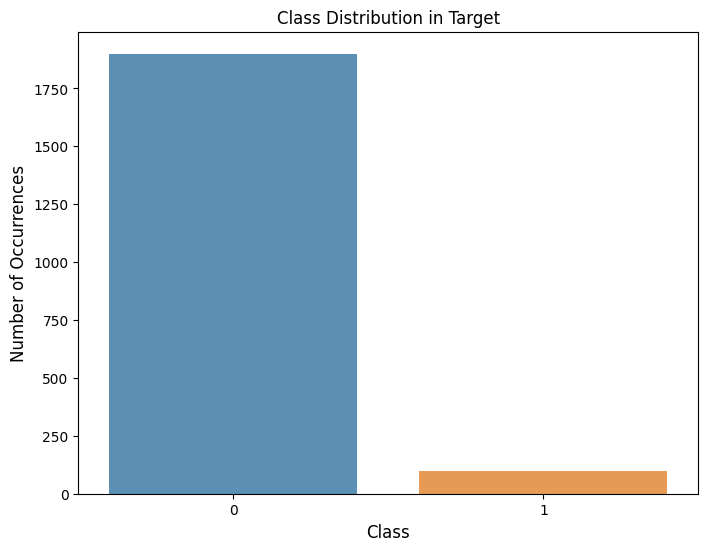

    このデータセットにSMOTE-NCを適用し、少数派クラス（この場合は詐欺取引）のサンプルを合成的に増やします。

## SMOTE-NCで詐欺検出モデル構築
    必要なモジュールを読み込みます。

    以下、コードです。

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

    numpyとpandasはデータ処理に広く使用されるライブラリです。
    train_test_splitはデータセットを訓練セットとテストセットに分割するための関数です。
    SMOTENCは不均衡なデータセットに対してオーバーサンプリングを行うためのものです。
    Counterはコレクション内の要素の出現回数をカウントするためのクラスです。
    RandomForestClassifierはランダムフォレストを実装する分類器です。
    classification_reportは分類モデルの評価レポートを生成する関数です。

    サンプルデータを読み込み、学習データとテストデータに分割。その後、学習データの目的変数の分布を表示し不均衡出ることを確かめます。

    以下、コードです。

In [4]:
# データセットの読み込み
import pandas as pd
df = pd.read_csv('sample_data1.csv')

# 目的変数と説明変数の格納
y = df['target']
X = df.drop('target', axis=1)

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0)

# SMOTE-NCの適用前のクラス分布
print("Before SMOTE-NC: ", Counter(y_train))

# 正常（0）が1,321レコード、詐欺（1）が79レコードです。

Before SMOTE-NC:  Counter({0: 1321, 1: 79})


    データセットの読み込み:
    ・pandasライブラリを使用して、外部データソースからデータセットを読み込んでいます。
    ・ここでは、pd.read_csv('sample_data1.csv')を使ってCSVファイルからデータセットを読み込んでいます。

    目的変数と説明変数の格納:
    ・データセットから目的変数（予測したい変数）と説明変数（特徴量）を分けています。
    ・y = df['target']で目的変数（'target'列）を抽出しています。
    ・X = df.drop('target', axis=1)で説明変数を抽出しています（'target'列を除く全ての列）。

    データセットの分割:
    ・train_test_split関数を使用して、データセットを学習データとテストデータに分割しています。
    ・test_size=0.3はテストセットがデータセットの30%を占めることを意味しています。
    ・random_state=0は分割が再現可能であることを保証するための乱数シードです。

    SMOTE-NCの適用前のクラス分布の確認:
    ・Counter(y_train)を使用して、学習データにおける目的変数のクラス分布を確認しています。


    では、SMOTE-NCでバランスの取れたデータセットを作ります。

    以下、コードです。

In [5]:
# SMOTE-NCの初期化と適用
smote_nc = SMOTENC(
    categorical_features=[4],
    random_state=123)
X_train_r, y_train_r = smote_nc.fit_resample(
    X_train,
    y_train)

# SMOTE-NC適用後のクラス分布
print("After SMOTE-NC: ", Counter(y_train_r))

# 正常（0）が1,321レコード、詐欺（1）が1,321レコードです。

After SMOTE-NC:  Counter({0: 1321, 1: 1321})


    SMOTE-NCの初期化:
    ・SMOTENCクラスを使用してSMOTE-NCのインスタンスを初期化しています。このクラスは、特にカテゴリカル変数を含む不均衡データセットに適用されるオーバーサンプリングするためのものです。
    ・categorical_features=[4]は、データセット内のカテゴリカル変数のインデックスを指定しています。ここでは、インデックス4（5番目の特徴量）がカテゴリカル変数であることを示しています。
    ・random_state=123は、再現可能な結果を得るための乱数シードを設定しています。

    SMOTE-NCの適用:
    ・fit_resampleメソッドを使用して、SMOTE-NCを学習データ（X_train, y_train）に適用しています。このメソッドは、データセットのクラスバランスを改善するために、少数派クラスのサンプルを合成的に増やします。
    ・X_train_rとy_train_rは、リサンプリングされた特徴量と目的変数を保持します。

    SMOTE-NC適用後のクラス分布の表示:
    ・print("After SMOTE-NC: ", Counter(y_train_r))では、リサンプリング後の目的変数のクラス分布を表示しています。
    ・Counterは、各クラスに属するサンプル数をカウントしています。

    このデータセットで詐欺検出モデルを訓練し、そのパフォーマンスをテストデータで検証します。

    以下、コードです。

In [6]:
# ランダムフォレストモデルの訓練
model = RandomForestClassifier(random_state=0)
model.fit(X_train_r, y_train_r)

# モデルの評価
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       579
           1       0.84      1.00      0.91        21

    accuracy                           0.99       600
   macro avg       0.92      1.00      0.95       600
weighted avg       0.99      0.99      0.99       600



    この結果は、分類モデルの評価レポートで、2つのクラス（0と1）をどのように分類（予測）したかに関する情報が含まれています。

    Precision (精度):
    ・クラスごとの精度は、そのクラスに分類された項目のうち、正しく分類された項目の割合です。
    ・クラス0に対する精度は100%（1.00）、クラス1に対する精度は84%（0.84）です。

    Recall (再現率):
    ・再現率は、実際のクラス内の項目のうち、正しく分類された項目の割合です。
    ・クラス0に対する再現率は99%、クラス1に対する再現率は100%です。

    F1-Score (F1スコア):
    ・F1スコアは、精度と再現率の調和平均で、バランスの取れた分類器の性能を示します。
    ・クラス0に対するF1スコアは約100%（1.00）、クラス1に対するF1スコアは91%（0.91）です。

    Support (サポート):
    ・サポートは、テストデータセットにおける各クラスの実際の出現回数です。
    ・クラス0は579回、クラス1は21回出現しています。

    Accuracy (全体的な正答率):
    ・全体的な精度は、全てのクラスにおいて正しく分類された項目の割合です。
    ・このモデルの全体的な正答率は99%（0.99）です。

    Macro Avg (マクロ平均):
    ・マクロ平均は、各クラスに対する精度、再現率、F1スコアの単純平均です。
    ・マクロ平均の精度は92%、F1スコアは95%です。

    Weighted Avg (加重平均):
    ・加重平均は、各クラスのサポート（出現回数）を考慮した精度、再現率、F1スコアの平均です。
    ・加重平均の精度、F1スコアは共に99%です。
    
    このレポートから、モデルが正常（0）を非常に高い精度で識別できていること、また詐欺（1）も高い再現率で識別できていることがわかります。

## SMOTE-NCの注意点と対策、高精度なモデルへ
    SMOTE-NCを使用する際には、いくつかの重要な注意点とその対策があります。

    SMOTE-NCの適用時の注意点
    ・データ品質の確保: SMOTE-NCはデータそのものの品質を改善しません。
    不正確なデータやノイズが多いデータセットに適用しても、期待する結果は得られない可能性があります。
    ・過剰適合の防止: SMOTE-NCは新しいサンプルを合成的に生成しますが、
    これによって過剰適合が発生することがあります。特に、サンプル数が少ないクラスにおいては注意が必要です。
    
    データの品質と過剰適合への対策
    ・データの前処理とクリーニング: 欠損値の処理や外れ値の除去など、適切なデータ前処理を行うことが重要です。
    ・クロスバリデーションの利用: モデルの汎化能力を評価するためにクロスバリデーションを実施し、過剰適合を防ぐことが推奨されます。

    より高精度はモデルを構築するには
    ・パラメータの調整: SMOTE-NCのパラメータ（例えば、最近傍の数）は、データセットの特性に合わせて調整することが重要です。
    ・モデルの選択と評価: SMOTE-NCを適用した後のデータセットで複数のモデルを試し、最適なモデルを選択することが重要です。
    
    SMOTE-NCは、データ不均衡問題に対処する強力なツールですが、その適用には慎重なアプローチが必要です。
    データの品質を保ち、適切なモデル評価を行うことで、SMOTE-NCの利点を最大限に活用できます。

## クロスバリデーションの利用
    過剰適合を防ぎモデルの汎化能力を評価するための、クロスバリデーション（CV）を組み込んだSMOTE-NCの実施例です。

    今回は、簡単にするために学習データとテストデータによる分割をせずクロスバリデーション（CV）部分のみにしています。

    ちなみに、利用するサンプルデータは先ほどの事例（sample_data1.csv）のものを使います。

    以下、コードです。CVのコードの個所の背景の色を変えています。

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTENC
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# データセットの読み込み
df = pd.read_csv('sample_data1.csv')

# 目的変数と説明変数の格納
y = df['target']
X = df.drop('target', axis=1)

# Stratified K-Foldクロスバリデーション(ここから「背景の色を変えています。」)
skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracies = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # SMOTE-NCの初期化と適用
    smote_nc = SMOTENC(categorical_features=[4], random_state=0)
    X_train_r, y_train_r = smote_nc.fit_resample(X_train, y_train)

    # ランダムフォレストモデルの訓練
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train_r, y_train_r)

    # モデルの評価
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    # ここまで「背景の色を変えています。」

# 平均精度の表示
print("Average accuracy:", np.mean(accuracies))

# 正答率の平均値です。他の指標の平均値も出力したい場合には、コードの中に組み込んでください。

Average accuracy: 0.9960000000000001


    データセットの読み込み:
    ・pandasライブラリを使用してCSVファイルからデータセットを読み込んでいます。

    目的変数と説明変数の格納:
    ・目的変数（y）と説明変数（X）をデータフレームから分離しています。

    Stratified K-Foldクロスバリデーションの設定:
    ・StratifiedKFoldを使用して、データセットを5つの異なるサブセット（”folds”と呼ばれます）に分割します。
    この手法は、各分割において元のデータセットのクラス比率を維持するために使用されます。
    ・random_state=0は、結果の再現性を保証するために設定され、shuffle=Trueは分割前にデータをシャッフルします。

    クロスバリデーションの実施:
    ・for train_index, test_index in skf.split(X, y):を通じて、データセットを訓練セットとテストセットに分割します。

    SMOTE-NCの適用:
    ・SMOTENCを使用して訓練データセットにオーバーサンプリングを適用し、クラスの不均衡を解消します。
    categorical_features=[4]は、データセット内のカテゴリカル変数の位置を指定します。

    ランダムフォレストモデルの訓練:
    ・RandomForestClassifierを使用して、再サンプリングされた訓練データセットでモデルを訓練します。

    モデルの評価:
    ・model.predict(X_test)でテストデータセットの予測を行い、accuracy_scoreで予測の精度を計算します。この精度はaccuraciesリストに追加されます。
    
    平均精度の表示:
    ・全てのサブセットでの精度の平均を計算し、モデルの全体的な性能を評価しています。

##SMOTE-NCにハイパーパラメータ調整を組み込む
    SMOTE-NCのハイパーパラメータ調整
    GridSearchCVを利用して、ランダムフォレストモデルのハイパーパラメータとSMOTE-NCのk_neighborsパラメータの最適な組み合わせを探索します。

    利用するサンプルデータは先ほどの事例（sample_data1.csv）のものを使います。

    以下、コードです。

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# データセットの読み込み
df = pd.read_csv('sample_data1.csv')

# 目的変数と説明変数の格納
y = df['target']
X = df.drop('target', axis=1)

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0)

# パイプラインの作成
pipeline = Pipeline([
    ('smote', SMOTENC(categorical_features=[4], random_state=0)),
    ('classifier', RandomForestClassifier(random_state=0))
])

# グリッドサーチのパラメータ
parameters = {
    'smote__k_neighbors': [3, 5, 7],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10]
}

# グリッドサーチの実行
grid_search = GridSearchCV(
    pipeline,
    parameters,
    cv=5,
    scoring='accuracy')
grid_search.fit(X_train, y_train)

# 最適なパラメータの表示
print("Best parameters found: ", grid_search.best_params_)

# モデルの評価
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# この結果は、ランダムフォレスト分類モデルのグリッドサーチと評価のアウトプットを示しています。

Best parameters found:  {'classifier__max_depth': None, 'classifier__n_estimators': 50, 'smote__k_neighbors': 3}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       579
           1       0.84      1.00      0.91        21

    accuracy                           0.99       600
   macro avg       0.92      1.00      0.95       600
weighted avg       0.99      0.99      0.99       600



    データセットの読み込み:
    ・pandasを使用してCSVファイルからデータセットを読み込みます。

    目的変数と説明変数の格納:
    ・データセットから目的変数（'target'）と説明変数を分離します。

    データセットの分割:
    ・train_test_splitを使用してデータセットを訓練セットとテストセットに分割します。

    パイプラインの作成:
    ・SMOTENCとRandomForestClassifierを含むパイプラインを作成します。
    SMOTENCは、特にカテゴリカル変数を含む不均衡なデータセットに適したオーバーサンプリング手法です。

    グリッドサーチのパラメータ設定:
    ・SMOTENCのk_neighborsとランダムフォレストのn_estimators、max_depthに関する異なるパラメータ値を設定します。

    グリッドサーチの実行:
    ・GridSearchCVを使用して、設定されたパラメータの組み合わせにより最適なモデルを探索します。
    これにより、パラメータチューニングを通じてモデルのパフォーマンスを最大化することができます。

    最適なパラメータの表示:
    ・グリッドサーチで見つかった最適なパラメータを表示します。

    モデルの評価:
    ・最適なパラメータを持つモデルでテストデータセットを予測し、classification_reportを使用して性能を評価します。

## 分類器の選択も組み込みハイパーパラメータ調整
    さらに、どの分類器を使うのかというハイパーパラメータと、選択した分類器のハイパーパラメータも組み込みます。

    以下、コードです。

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# データセットの読み込み
df = pd.read_csv('sample_data1.csv')

# 目的変数と説明変数の格納
y = df['target']
X = df.drop('target', axis=1)

# データセットの分割
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=0)

# パイプラインの作成
pipeline = Pipeline([
    ('smote', SMOTENC(categorical_features=[4], random_state=0)),
    ('classifier', RandomForestClassifier())
])

# グリッドサーチのパラメータ
parameters = [
    {
        'classifier': [RandomForestClassifier(random_state=0)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10]
    },
    {
        'classifier': [LogisticRegression(random_state=0)],
        'classifier__C': [0.01, 0.1, 1, 10]
    },
    {
        'classifier': [SVC(random_state=0)],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    {
        'classifier': [DecisionTreeClassifier(random_state=0)],
        'classifier__max_depth': [None, 5, 10]
    },
    {
        'classifier': [GradientBoostingClassifier(random_state=0)],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1]
    }
]

# グリッドサーチの実行
grid_search = GridSearchCV(
    pipeline,
    parameters,
    cv=5,
    scoring='accuracy')
grid_search.fit(X_train, y_train)

# 最適なモデルとパラメータの表示
print("Best model and parameters found: ", grid_search.best_params_)

# 最適なモデルでの評価
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best model and parameters found:  {'classifier': GradientBoostingClassifier(learning_rate=1, n_estimators=50, random_state=0), 'classifier__learning_rate': 1, 'classifier__n_estimators': 50}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       579
           1       0.84      1.00      0.91        21

    accuracy                           0.99       600
   macro avg       0.92      1.00      0.95       600
weighted avg       0.99      0.99      0.99       600



    データセットの読み込み:
    ・pandasを用いてCSVファイルからデータセットを読み込みます。

    目的変数と説明変数の分離:
    ・目的変数（y）と説明変数（X）をデータセットから分離します。

    データセットの分割:
    ・train_test_split関数を使って、データセットを訓練セットとテストセットに分割します。

    パイプラインの作成:
    ・SMOTENCオーバーサンプリングとランダムフォレスト分類モデルを含むパイプラインを構築します。

    グリッドサーチのパラメータ設定:
    ・複数の分類アルゴリズム（ランダムフォレスト、ロジスティック回帰、SVC、決定木、勾配ブースティング）とそれぞれの異なるパラメータを設定します。

    グリッドサーチの実行:
    ・GridSearchCVを用いて訓練セット上でパラメータの組み合わせを試し、最適なモデルとそのパラメータを特定します。

    最適なモデルとパラメータの表示:
    ・グリッドサーチにより見つかった最適なモデルとパラメータを表示します。

    最適なモデルの評価:
    ・最適なモデルをテストセットに適用し、その性能をclassification_reportを用いて評価します。

    以下の28行目から32行目の、パイプラインを作成するコードの補足です。

    # パイプラインの作成
    pipeline = Pipeline([
    ('smote', SMOTENC(categorical_features=[4], random_state=0)),
    ('classifier', RandomForestClassifier())
    ])

    Pipeline内で('classifier', RandomForestClassifier())としランダムフォレストを指定ていますが、これは単なる初期値です。
    実際のモデルはグリッドサーチのパラメータリスト内で動的に変更されます。

    この結果は、グリッドサーチを用いて様々な機械学習モデルの中から最適な分類器のモデルを特定し、その性能を評価したものです。

    最適なモデルとパラメータ:
    ・最適なモデルとして、GradientBoostingClassifierが選ばれました。このモデルはlearning_rate=1とn_estimators=50をパラメータとして使用します。
    ・learning_rateは学習率を制御し、n_estimatorsはアンサンブル内の決定木の数を指定します。

    モデルの評価レポート:
    ・テストデータセットに対するモデルの性能は、precision（精度）、recall（再現率）、f1-score（F1スコア）を含むレポートによって評価されています。
    ・クラス0（多数派）に対する精度は100%、再現率は99%、F1スコアは100%です。
    ・クラス1（少数派）に対する精度は84%、再現率は100%、F1スコアは91%です。

    全体的な性能指標:
    ・accuracy（全体的な正答率）は99%です。
    ・macro avg（クラスごとの平均）の精度は92%、F1スコアは95%です。
    ・weighted avg（サンプルサイズによる加重平均）の精度とF1スコアは共に99%です。

## まとめ
    今回は、カテゴリカル変数が混在するデータセットに対するSMOTE-NCの適用と、その実例について解説しました。

    SMOTE-NCはカテゴリカル変数を含むデータセットの不均衡問題を解消する強力なツールであり、適切な前処理、パラメータの調整、
    そして様々なモデルとの組み合わせによって、その効果を最大限に引き出すことができます。

    データ不均衡は多くの分野での課題であるため、SMOTE-NCの活用はデータサイエンスにおいて重要な役割を果たします。

